In [1]:
import numpy as np
import altair as alt
import pandas as pd
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from readers import WAMReachData as wrd
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [2]:
pwd()

'D:\\Users\\ajames\\Dropbox\\SWET\\PythonProjects\\py-hydro-data\\notebooks'

In [16]:
scene6inflow = pd.read_csv('../data/Scenario6InflowPump.csv', parse_dates=True, header=0, names=['Date', 'Inflow'])
scene6inflow['Date'] = pd.to_datetime(scene6inflow['Date'])
scene6inflow.index = scene6inflow['Date']
scene6inflow.loc[:,'Scenario'] = 'Scenario 6'
scene6inflow['Cumulative'] = scene6inflow.Inflow.cumsum()
print(scene6inflow.head())

scene5inflow = pd.read_csv('../data/Scenario5ActLakeInflowPump.csv', parse_dates=True, header=0, names=['Date', 'Inflow'])
scene5inflow['Date'] = pd.to_datetime(scene5inflow['Date'])
scene5inflow.index = scene5inflow['Date']
scene5inflow.loc[:,'Scenario'] = 'Scenario 5'
scene5inflow['Cumulative'] = scene5inflow.Inflow.cumsum()
print(scene5inflow.head())

all_inflow = scene6inflow.append(scene5inflow)

print(all_inflow.head())

                 Date  Inflow    Scenario  Cumulative
Date                                                 
2008-01-01 2008-01-01     0.0  Scenario 6         0.0
2008-01-02 2008-01-02     0.0  Scenario 6         0.0
2008-01-03 2008-01-03     0.0  Scenario 6         0.0
2008-01-04 2008-01-04     0.0  Scenario 6         0.0
2008-01-05 2008-01-05     0.0  Scenario 6         0.0
                 Date  Inflow    Scenario  Cumulative
Date                                                 
2008-01-01 2008-01-01     0.0  Scenario 5         0.0
2008-01-02 2008-01-02     0.0  Scenario 5         0.0
2008-01-03 2008-01-03     0.0  Scenario 5         0.0
2008-01-04 2008-01-04     0.0  Scenario 5         0.0
2008-01-05 2008-01-05     0.0  Scenario 5         0.0
                 Date  Inflow    Scenario  Cumulative
Date                                                 
2008-01-01 2008-01-01     0.0  Scenario 6         0.0
2008-01-02 2008-01-02     0.0  Scenario 6         0.0
2008-01-03 2008-01-03     0.

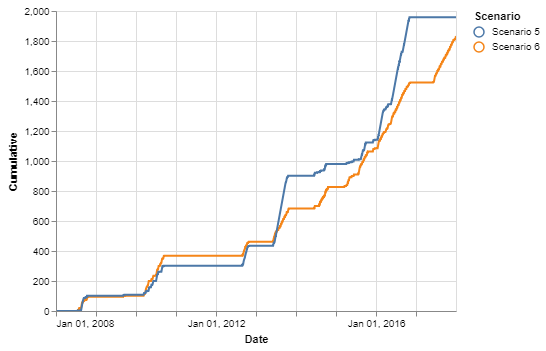

In [18]:
alt.Chart(all_inflow).mark_line().encode(
    x=alt.X('Date:T'),
    y=alt.Y('Cumulative'),
    color='Scenario:N'
).interactive()

In [22]:
pv_flow = all_inflow.pivot(index='Date', columns='Scenario', values='Inflow')
pv_flow.resample('A').apply(sum)

Scenario,Scenario 5,Scenario 6
Date,,
2008-12-31,101.2523,94.8048
2009-12-31,6.7115,7.2420
2010-12-31,194.1863,265.9799
2011-12-31,0.0000,0.0000
2012-12-31,132.5724,93.4883
2013-12-31,466.7326,222.5279
2014-12-31,78.1443,142.8656
2015-12-31,162.3636,257.4214
2016-12-31,816.2594,439.1305


In [70]:
# CS_O1_S5_Outflow = wrd.WAMReachData(filename='../data/S5_reach000015_14.csv')

The data from the base scenario:

In [2]:
CS_O1_B_R15 = wrd.WAMReachData(filename='../data/Base_reach000015_14.csv')
PumpIn_B_R6 = wrd.WAMReachData(filename='../data/Base_reach000006_12.csv')
CS_O2_B_R42 = wrd.WAMReachData(filename='../data/Base_reach000040_7.csv')
CS_O3_B_R41 = wrd.WAMReachData(filename='../data/Base_reach000038_20.csv')
S84_B_R2 = wrd.WAMReachData(filename='../data/Base_reach000002_1.csv')
S75_B_R13 = wrd.WAMReachData(filename='../data/Base_reach000013_0.csv')

The data from scenario 6:

In [3]:
CS_O1_S6_R15 = wrd.WAMReachData(filename='../data/S6_reach000015_14.csv')
PumpIn_S6_R6 = wrd.WAMReachData(filename='../data/S6_reach000006_12.csv')
CS_O2_S6_R42 = wrd.WAMReachData(filename='../data/S6_reach000042_7.csv')
CS_O3_S6_R41 = wrd.WAMReachData(filename='../data/S6_reach000041_20.csv')
S84_S6_R2 = wrd.WAMReachData(filename='../data/S6_reach000002_1.csv')
S75_S6_R13 = wrd.WAMReachData(filename='../data/S6_reach000013_0.csv')

Estimates for the full time period, 2008-2017

In [36]:
bv_res = pd.DataFrame(columns = ['Location','Base TN', 'Base TP', 'Scenario 6 TN', 'Scenario 6 TP'])

s = [['Pump Inflow'], PumpIn_B_R6.reach_data['2008-01-01':'2017-12-31'][['TotalNLoad', 'TotalPLoad']].sum(),PumpIn_S6_R6.reach_data['2008-01-01':'2017-12-31'][['TotalNLoad', 'TotalPLoad']].sum()]
bv_res.loc[0] = [item for sublist in s for item in sublist]

s = [['Outflow CS-O1'], CS_O1_B_R15.reach_data['2008-01-01':'2017-12-31'][['TotalNLoad', 'TotalPLoad']].sum(),CS_O1_S6_R15.reach_data['2008-01-01':'2017-12-31'][['TotalNLoad', 'TotalPLoad']].sum()]
bv_res.loc[1] = [item for sublist in s for item in sublist]

s = [['Outflow CS-O2'], CS_O2_B_R42.reach_data['2008-01-01':'2017-12-31'][['TotalNLoad', 'TotalPLoad']].sum(),CS_O2_S6_R42.reach_data['2008-01-01':'2017-12-31'][['TotalNLoad', 'TotalPLoad']].sum()]
bv_res.loc[2] = [item for sublist in s for item in sublist]

s = [['Outflow CS-O3'], CS_O3_B_R41.reach_data['2008-01-01':'2017-12-31'][['TotalNLoad', 'TotalPLoad']].sum(),CS_O3_S6_R41.reach_data['2008-01-01':'2017-12-31'][['TotalNLoad', 'TotalPLoad']].sum()]
bv_res.loc[3] = [item for sublist in s for item in sublist]

s = [['Outflow S75'], S75_B_R13.reach_data['2008-01-01':'2017-12-31'][['TotalNLoad', 'TotalPLoad']].sum(),S75_S6_R13.reach_data['2008-01-01':'2017-12-31'][['TotalNLoad', 'TotalPLoad']].sum()]
bv_res.loc[5] = [item for sublist in s for item in sublist]

s = [['Outflow S84'], S84_B_R2.reach_data['2008-01-01':'2017-12-31'][['TotalNLoad', 'TotalPLoad']].sum(),S84_S6_R2.reach_data['2008-01-01':'2017-12-31'][['TotalNLoad', 'TotalPLoad']].sum()]
bv_res.loc[4] = [item for sublist in s for item in sublist]

bv_res['TN Diff'] = bv_res['Scenario 6 TN'] - bv_res['Base TN']

bv_res['TP Diff'] = bv_res['Scenario 6 TP'] - bv_res['Base TP']

writer = pd.ExcelWriter('BrightonScenario6_2008_2017.xlsx')
bv_res.to_excel(writer, 'Scenario6')
writer.save()


Estimates from 2008-2016:

In [37]:
bv_res_sh = pd.DataFrame(columns = ['Location','Base TN', 'Base TP', 'Scenario 6 TN', 'Scenario 6 TP'])

s = [['Pump Inflow'], PumpIn_B_R6.reach_data['2008-01-01':'2016-12-31'][['TotalNLoad', 'TotalPLoad']].sum(),PumpIn_S6_R6.reach_data['2008-01-01':'2016-12-31'][['TotalNLoad', 'TotalPLoad']].sum()]
bv_res_sh.loc[0] = [item for sublist in s for item in sublist]

s = [['Outflow CS-O1'], CS_O1_B_R15.reach_data['2008-01-01':'2016-12-31'][['TotalNLoad', 'TotalPLoad']].sum(),CS_O1_S6_R15.reach_data['2008-01-01':'2016-12-31'][['TotalNLoad', 'TotalPLoad']].sum()]
bv_res_sh.loc[1] = [item for sublist in s for item in sublist]

s = [['Outflow CS-O2'], CS_O2_B_R42.reach_data['2008-01-01':'2016-12-31'][['TotalNLoad', 'TotalPLoad']].sum(),CS_O2_S6_R42.reach_data['2008-01-01':'2016-12-31'][['TotalNLoad', 'TotalPLoad']].sum()]
bv_res_sh.loc[2] = [item for sublist in s for item in sublist]

s = [['Outflow CS-O3'], CS_O3_B_R41.reach_data['2008-01-01':'2016-12-31'][['TotalNLoad', 'TotalPLoad']].sum(),CS_O3_S6_R41.reach_data['2008-01-01':'2016-12-31'][['TotalNLoad', 'TotalPLoad']].sum()]
bv_res_sh.loc[3] = [item for sublist in s for item in sublist]

s = [['Outflow S75'], S75_B_R13.reach_data['2008-01-01':'2016-12-31'][['TotalNLoad', 'TotalPLoad']].sum(),S75_S6_R13.reach_data['2008-01-01':'2016-12-31'][['TotalNLoad', 'TotalPLoad']].sum()]
bv_res_sh.loc[5] = [item for sublist in s for item in sublist]

s = [['Outflow S84'], S84_B_R2.reach_data['2008-01-01':'2016-12-31'][['TotalNLoad', 'TotalPLoad']].sum(),S84_S6_R2.reach_data['2008-01-01':'2016-12-31'][['TotalNLoad', 'TotalPLoad']].sum()]
bv_res_sh.loc[4] = [item for sublist in s for item in sublist]

bv_res_sh['TN Diff'] = bv_res_sh['Scenario 6 TN'] - bv_res_sh['Base TN']

bv_res_sh['TP Diff'] = bv_res_sh['Scenario 6 TP'] - bv_res_sh['Base TP']

writer = pd.ExcelWriter('BrightonScenario6_2008_2016.xlsx')
bv_res_sh.to_excel(writer, 'Scenario6')
writer.save()


In [91]:
print('Pump In\n{0}'.format(PumpIn_S6_R6.reach_data['2008-01-01':'2017-12-31'][['TotalNLoad', 'TotalPLoad']].sum()))
print('Outflow CS-O1\n{0}'.format(CS_O1_S6_R15.reach_data['2008-01-01':'2017-12-31'][['TotalNLoad', 'TotalPLoad']].sum()))
print('Outflow CS-O2\n{0}'.format(CS_O2_S6_R42.reach_data['2008-01-01':'2017-12-31'][['TotalNLoad', 'TotalPLoad']].sum()))
print('Outflow CS-O3\n{0}'.format(CS_O3_S6_R41.reach_data['2008-01-01':'2017-12-31'][['TotalNLoad', 'TotalPLoad']].sum()))
print('Outflow S84\n{0}'.format(S84_S6_R2.reach_data['2008-01-01':'2017-12-31'][['TotalNLoad', 'TotalPLoad']].sum()))
print('Outflow C75\n{0}'.format(S75_S6_R13.reach_data['2008-01-01':'2017-12-31'][['TotalNLoad', 'TotalPLoad']].sum()))


Pump In
TotalNLoad    774945.01841
TotalPLoad     45887.48072
dtype: float64
Outflow CS-O1
TotalNLoad    569014.612914
TotalPLoad     16204.983627
dtype: float64
Outflow CS-O2
TotalNLoad    5775.596360
TotalPLoad      72.434102
dtype: float64
Outflow CS-O3
TotalNLoad    4849.191433
TotalPLoad      59.250263
dtype: float64
Outflow S84
TotalNLoad    4.589017e+06
TotalPLoad    2.636253e+05
dtype: float64
Outflow C75
TotalNLoad    1.626632e+06
TotalPLoad    1.412734e+05
dtype: float64


In [85]:
CS_O1_S6_R15.reach_data['2008-01-01':'2017-12-31'].sum()['TotalNLoad']

569014.6129143084

In [94]:
print('Pump In\n{0}'.format(PumpIn_B_R6.reach_data['2008-01-01':'2017-12-31'][['TotalNLoad', 'TotalPLoad']].sum()))
print('Outflow CS-O1\n{0}'.format(CS_O1_B_R15.reach_data['2008-01-01':'2017-12-31'][['TotalNLoad', 'TotalPLoad']].sum()))
print('Outflow CS-O2\n{0}'.format(CS_O2_B_R42.reach_data['2008-01-01':'2017-12-31'][['TotalNLoad', 'TotalPLoad']].sum()))
print('Outflow CS-O3\n{0}'.format(CS_O3_B_R41.reach_data['2008-01-01':'2017-12-31'][['TotalNLoad', 'TotalPLoad']].sum()))
print('Outflow S84\n{0}'.format(S84_B_R2.reach_data['2008-01-01':'2017-12-31'][['TotalNLoad', 'TotalPLoad']].sum()))
print('Outflow C75\n{0}'.format(S75_B_R13.reach_data['2008-01-01':'2017-12-31'][['TotalNLoad', 'TotalPLoad']].sum()))


Pump In
TotalNLoad    0.0
TotalPLoad    0.0
dtype: float64
Outflow CS-O1
TotalNLoad    87350.533807
TotalPLoad     3194.491974
dtype: float64
Outflow CS-O2
TotalNLoad   -1044.925134
TotalPLoad     -42.255480
dtype: float64
Outflow CS-O3
TotalNLoad   -8717.787008
TotalPLoad    -366.371440
dtype: float64
Outflow S84
TotalNLoad    5.338708e+06
TotalPLoad    3.080932e+05
dtype: float64
Outflow C75
TotalNLoad    1.139914e+06
TotalPLoad    1.264833e+05
dtype: float64


In [64]:
tn06['2008-01-01':'2017-12-31'].sum()

TotalNLoadS6    458293.567158
dtype: float64

In [74]:
tn062 = CS_O1_S6_R15.get_annual_sums('TotalNLoad')
tn062['2008-01-01':'2017-12-31'].sum()

569014.6129143093